# Machine Learning (second part): Intermediate report

In [1]:
student_name='QIAN ZECHANG'
student_id='20M31355'

# 1. Multi-class classification on MNIST

In [30]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [32]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
X_train=X_train/255
X_test=X_test/255
y_t=y_test
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [67]:
class CNN(object):
    def __init__(self):
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model = model

In [68]:
cnn=CNN().model
cnn.fit(X_train, y_train, batch_size=128, epochs=1)
score=cnn.evaluate(X_test,y_test)

Train on 60000 samples
10000/10000 [==============================] - 1s 119us/sample - loss: 0.0742 - accuracy: 0.9755


In [69]:
print('accuracy',score[1])

accuracy 0.9755


# 2. Confusion matrix

In [70]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict_classes = cnn.predict_classes(X_test)
true_classes = y_t
print(confusion_matrix(true_classes, predict_classes))

[[ 977    0    0    0    0    1    1    0    0    1]
 [   1 1128    1    1    0    2    1    0    1    0]
 [  12    5  986    7    0    0    2    8   12    0]
 [   2    0    1  989    0   11    0    1    3    3]
 [   2    0    0    1  959    0   12    0    2    6]
 [   2    0    0    1    0  884    3    1    1    0]
 [   6    1    0    0    1    5  945    0    0    0]
 [   2    9    4   13    0    1    0  968    5   26]
 [   7    1    1    3    1    6    2    0  944    9]
 [   5    3    0    3    4   16    1    0    2  975]]


# 3. Top-3 easy and confusing examples

In [143]:
diff=[]
for k,v in enumerate(predict_classes):
    if v != y_t[k]:
        a=cnn.predict(X_test[k].reshape(1,28,28,1))
        a_list=a.tolist()
        i=a_list[0].index(max(a_list[0]))
        diff.append([k,i,max(a_list[0])])
diff

[[62, 5, 0.494524210691452],
 [104, 5, 0.8148084878921509],
 [247, 6, 0.9261919856071472],
 [259, 0, 0.8650176525115967],
 [290, 5, 0.673327624797821],
 [318, 3, 0.5915279984474182],
 [320, 8, 0.5767866969108582],
 [321, 7, 0.7666307091712952],
 [358, 1, 0.384794682264328],
 [421, 0, 0.6284684538841248],
 [444, 8, 0.531647264957428],
 [445, 0, 0.9555642604827881],
 [449, 5, 0.9882903099060059],
 [495, 0, 0.806287407875061],
 [522, 3, 0.6603897213935852],
 [551, 3, 0.5771819949150085],
 [582, 2, 0.49016720056533813],
 [583, 3, 0.7631633877754211],
 [613, 8, 0.5356215238571167],
 [619, 8, 0.8252421021461487],
 [646, 6, 0.89747554063797],
 [659, 1, 0.8802308440208435],
 [684, 3, 0.8522632122039795],
 [717, 5, 0.5759872794151306],
 [720, 8, 0.6177695989608765],
 [726, 5, 0.736988365650177],
 [740, 9, 0.860151469707489],
 [846, 9, 0.6112138628959656],
 [926, 0, 0.33989694714546204],
 [938, 5, 0.621955931186676],
 [939, 0, 0.7278220653533936],
 [947, 9, 0.8381429314613342],
 [1012, 3, 0.4968

In [142]:
same=[]
for k,v in enumerate(predict_classes):
    if v == y_t[k]:
        a=cnn.predict(X_test[k].reshape(1,28,28,1))
        a_list=a.tolist()
        i=a_list[0].index(max(a_list[0]))
        same.append([k,i,max(a_list[0])])
same

[[0, 7, 0.9983296990394592],
 [1, 2, 0.9749791026115417],
 [2, 1, 0.99736088514328],
 [3, 0, 0.9999687671661377],
 [4, 4, 0.999932050704956],
 [5, 1, 0.9994303584098816],
 [6, 4, 0.9621068835258484],
 [7, 9, 0.9539241790771484],
 [8, 5, 0.9516470432281494],
 [9, 9, 0.9989902377128601],
 [10, 0, 0.9999984502792358],
 [11, 6, 0.9998167157173157],
 [12, 9, 0.9991456270217896],
 [13, 0, 0.9999855756759644],
 [14, 1, 0.9995287656784058],
 [15, 5, 0.9998593330383301],
 [16, 9, 0.9996594190597534],
 [17, 7, 0.9972823858261108],
 [18, 3, 0.9289119243621826],
 [19, 4, 0.999954104423523],
 [20, 9, 0.9988738894462585],
 [21, 6, 0.9972217082977295],
 [22, 6, 0.9998860359191895],
 [23, 5, 0.9998787641525269],
 [24, 4, 0.9995347261428833],
 [25, 0, 0.9999397993087769],
 [26, 7, 0.9775692820549011],
 [27, 4, 0.9999990463256836],
 [28, 0, 0.9999945163726807],
 [29, 1, 0.9978392720222473],
 [30, 3, 0.9999489784240723],
 [31, 1, 0.9955843091011047],
 [32, 3, 0.9997608065605164],
 [33, 4, 0.5356792807579

In [144]:
con=[]
easy=[]
for i in range(3):
    diff_max=np.array(diff)[:,2].max()
    max_index=np.argwhere(np.array(diff)==diff_max)[0,0]
    con.append(diff[max_index])
    diff.remove(diff[max_index])
    
    same_max=np.array(same)[:,2].max()
    max_index=np.argwhere(np.array(same)==same_max)[0,0]
    easy.append(same[max_index])
    same.remove(same[max_index])
    
print(con)
print(easy)

[[2098, 0, 0.9980484247207642], [6505, 0, 0.9960359930992126], [2896, 0, 0.9957102537155151]]
[[6127, 0, 0.9999998807907104], [71, 0, 0.9999997615814209], [1804, 3, 0.9999997615814209]]


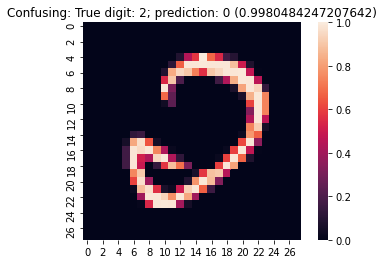

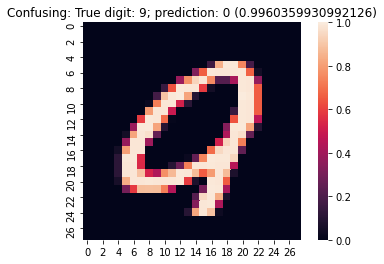

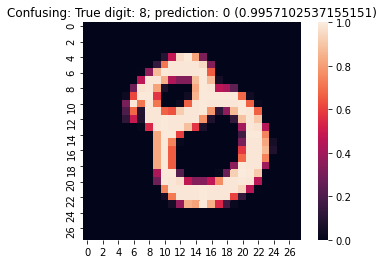

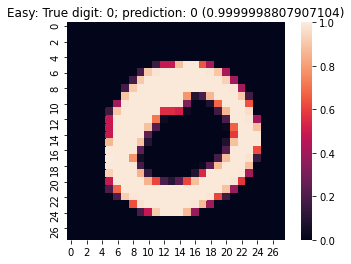

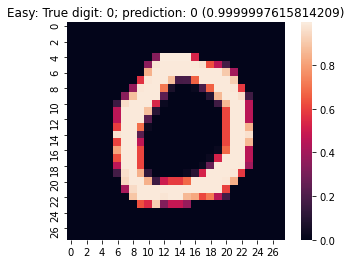

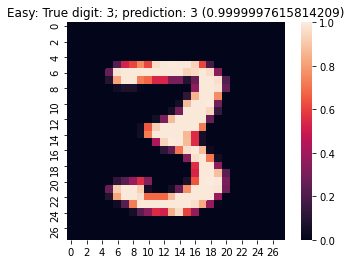

In [149]:
import seaborn as sn
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure()
    sn.heatmap(X_test[con[i][0]].reshape(28,28),square = True)
    plt.title('Confusing: True digit: '+str(y_t[con[i][0]])+'; prediction: '+
             str(con[i][1])+' ('+str(con[i][2])+')')
    plt.show()
for i in range(3):
    plt.figure()
    sn.heatmap(X_test[easy[i][0]].reshape(28,28),square = True)
    plt.title('Easy: True digit: '+str(y_t[easy[i][0]])+'; prediction: '+
             str(easy[i][1])+' ('+str(easy[i][2])+')')
    plt.show()

# 4. Recognize your handwritten digits